**ML Assignment**

Team number AIML Team-1


Raghavendra A Hallyal

Roll Number:- 533


 

In [38]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#importing necessory modules
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [40]:
# importing the dataset
x = []
y = []
print('extracting x-points and y-points')
with open('/content/drive/MyDrive/9.txt',mode='r',encoding='utf-8') as f:
	lines = f.read().split('\n')
	
for i in lines:
	x1,y1 = i.split(',')
	x.append(x1)
	y.append(y1)
# dataset
x = list(map(float,x))
y=list(map(float,y))
print('Doneextracting x-points and y-points')

extracting x-points and y-points
Doneextracting x-points and y-points


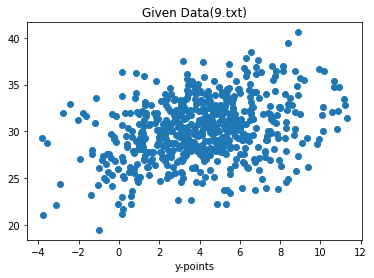

In [41]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x-points')
plt.xlabel('y-points')
plt.title("Given Data(9.txt)")
plt.show()

In [42]:
#arranging the data to assign it to the tensor
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)
#creating the tensors
X= torch.Tensor(A)
y= torch.Tensor(b)

In [43]:
#defining the model
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

#loss function
criterion = nn.MSELoss()
#stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 1001 #epochs
losses = []
for i in range (iterations):
 y_pred=model.forward(X)
 loss=criterion(y_pred,y)
 print(f"Epoch {i}: Loss: {loss}")
 losses.append(loss)
 optimizer.zero_grad()
 loss.backward() 
 optimizer.step()

Epoch 0: Loss: 1016.5205078125
Epoch 1: Loss: 455.16876220703125
Epoch 2: Loss: 307.2801513671875
Epoch 3: Loss: 266.70654296875
Epoch 4: Loss: 254.00619506835938
Epoch 5: Loss: 248.5648651123047
Epoch 6: Loss: 245.03302001953125
Epoch 7: Loss: 242.0222625732422
Epoch 8: Loss: 239.17202758789062
Epoch 9: Loss: 236.38836669921875
Epoch 10: Loss: 233.64669799804688
Epoch 11: Loss: 230.94029235839844
Epoch 12: Loss: 228.26710510253906
Epoch 13: Loss: 225.6262969970703
Epoch 14: Loss: 223.01744079589844
Epoch 15: Loss: 220.4401092529297
Epoch 16: Loss: 217.89385986328125
Epoch 17: Loss: 215.3783416748047
Epoch 18: Loss: 212.89317321777344
Epoch 19: Loss: 210.43804931640625
Epoch 20: Loss: 208.0125274658203
Epoch 21: Loss: 205.61630249023438
Epoch 22: Loss: 203.2489471435547
Epoch 23: Loss: 200.9102020263672
Epoch 24: Loss: 198.59971618652344
Epoch 25: Loss: 196.31707763671875
Epoch 26: Loss: 194.06199645996094
Epoch 27: Loss: 191.83416748046875
Epoch 28: Loss: 189.63320922851562
Epoch 29: 

## GRAPH PLOT OF EPOCH NUMBER AND ERROR

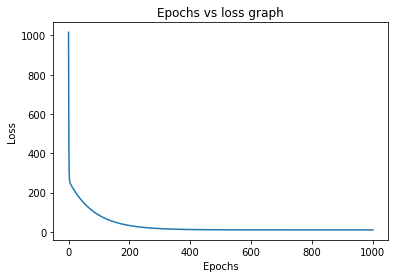

In [44]:
plt.plot(range(iterations),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs loss graph')
plt.show()

##Graph plot of 10 different learning rates Vs. Error (cost).


In [45]:
rate=[]
err=[]
all_loss=[]
theta0 = []
theta1 = []
l_rate=0.001
while(l_rate<0.01):
    model = nn.Linear(1,1)
    [a,b] = model.parameters()
    x=np.array(X)
    a = a[0][0].item()
    b = b[0].item()

    criterion = nn.MSELoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)

    iterations = 1000
    losses = []
    for i in range (iterations):
        y_pred=model.forward(X)
        loss=criterion(y_pred,y)
        print(f"Epoch {i}: Loss: {loss}            W:{model.weight.data.item()}                 b:{model.bias.data.item()}")
        losses.append(loss)
        all_loss.append(loss)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        theta0.append(model.weight.data)
        theta1.append(model.bias.data)
    rate.append(l_rate)
    err.append(loss)
    l_rate=l_rate+0.001

Streaming output truncated to the last 5000 lines.
Epoch 0: Loss: 907.4199829101562            W:0.08682096004486084                 b:-0.19527184963226318
Epoch 1: Loss: 623.440673828125            W:1.3228062391281128                 b:0.10426729172468185
Epoch 2: Loss: 461.07464599609375            W:2.252089262008667                 b:0.35074523091316223
Epoch 3: Loss: 367.9798278808594            W:2.9499142169952393                 b:0.5571160912513733
Epoch 4: Loss: 314.3435363769531            W:3.4730687141418457                 b:0.7331565618515015
Epoch 5: Loss: 283.1854248046875            W:3.864410161972046                 b:0.8862453103065491
Epoch 6: Loss: 264.8338317871094            W:4.156282901763916                 b:1.0219511985778809
Epoch 7: Loss: 253.78021240234375            W:4.3730974197387695                 b:1.144477128982544
Epoch 8: Loss: 246.88682556152344            W:4.533276081085205                 b:1.2569953203201294
Epoch 9: Loss: 242.3666992187

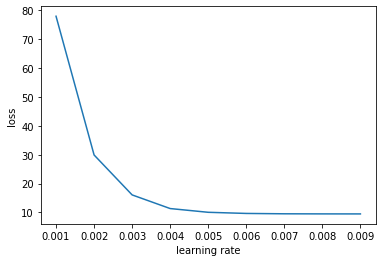

In [46]:
plt.plot(rate,err)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

##Graph plot of 10 different values for parameters (θ0 andθ1) Vs.Error (cost).

In [47]:
list1=[theta0[50].item(),theta0[1000].item(),theta0[2000].item(),theta0[3000].item(),theta0[4000].item(),theta0[5000].item(),theta0[6000].item(),theta0[7000].item(),theta0[8000].item(),theta0[8500].item(),theta0[8999].item()]
list2=[theta1[50].item(),theta1[1000].item(),theta1[2000].item(),theta1[3000].item(),theta1[4000].item(),theta1[5000].item(),theta1[6000].item(),theta1[7000].item(),theta1[8000].item(),theta1[8500].item(),theta1[8999].item()]
list3=[all_loss[50].item(),all_loss[1000].item(),all_loss[2000].item(),all_loss[3000].item(),all_loss[4000].item(),all_loss[5000].item(),all_loss[6000].item(),all_loss[7000].item(),all_loss[8000].item(),all_loss[8500].item(),all_loss[8999].item()]
print(list1)
print(list2)
print(list3)

[2.942591428756714, 1.7838810682296753, 1.1820061206817627, 0.811557412147522, 0.6230939626693726, 0.5185014009475708, 0.4585582911968231, 0.4288448989391327, 0.4121169447898865, 0.4121169447898865, 0.4121169447898865]
[13.70601749420166, 20.436872482299805, 23.9331111907959, 26.085020065307617, 27.17978858947754, 27.787357330322266, 28.135562896728516, 28.308164596557617, 28.405336380004883, 28.405336380004883, 28.405336380004883]
[229.88421630859375, 1139.2099609375, 936.8140869140625, 1078.3702392578125, 907.4199829101562, 1208.113525390625, 1121.07373046875, 836.63623046875, 1057.1417236328125, 10.510960578918457, 9.496496200561523]


In [48]:
pd = []
ls = []
for i in range(10):
    pd1 = []
    # for j in x:
    pd.append(list1[i]*x[0]+list2[i])
    ls.append(list3[i])
    # pd.append(pd1)        


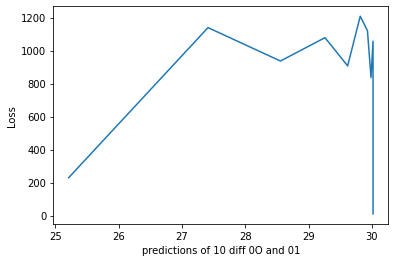

In [49]:
plt.plot(pd,ls)
plt.xlabel('predictions of 10 diff 0O and 01')
plt.ylabel('Loss')
plt.show()

##Gradient descent algorithm should stop running when an error (cost) is not getting decreased much compared to last few epochs instead of running till last epoch

In [52]:
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() 
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 1175.8568115234375
Epoch 1: Loss: 494.92193603515625
Epoch 2: Loss: 316.0221252441406
Epoch 3: Loss: 267.4205017089844
Epoch 4: Loss: 252.65577697753906
Epoch 5: Loss: 246.6973114013672
Epoch 6: Loss: 243.04957580566406
Epoch 7: Loss: 240.02685546875
Epoch 8: Loss: 237.1913604736328
Epoch 9: Loss: 234.42919921875
Epoch 10: Loss: 231.71054077148438
Epoch 11: Loss: 229.02731323242188
Epoch 12: Loss: 226.37718200683594
Epoch 13: Loss: 223.75921630859375
Epoch 14: Loss: 221.1728973388672
Epoch 15: Loss: 218.61781311035156
Epoch 16: Loss: 216.09353637695312
Epoch 17: Loss: 213.59976196289062
Epoch 18: Loss: 211.1361083984375
Epoch 19: Loss: 208.70213317871094
Epoch 20: Loss: 206.29757690429688
Epoch 21: Loss: 203.9220428466797
Epoch 22: Loss: 201.57518005371094
Epoch 23: Loss: 199.2566375732422
Epoch 24: Loss: 196.96607971191406
Epoch 25: Loss: 194.70318603515625
Epoch 26: Loss: 192.4675750732422
Epoch 27: Loss: 190.25897216796875
Epoch 28: Loss: 188.0770263671875
Epoch 29: L

##Dataset should be divided randomly like 70% for training and 30% for testing, so the algorithm should calculate parameters (θ0 andθ1) values by using only 70% data and find both training error (cost) and testing error (cost).

In [56]:
#importing train test split from sklearn
from sklearn.model_selection import train_test_split
import pandas as pdss
df = pdss.read_csv('/content/drive/MyDrive/9.txt',names=['x','y'])

train_data, test_data = train_test_split(df, test_size=0.3, random_state=25)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

x = train_data['x']
y = train_data['y']

# list(x)
# list(y)

No. of training examples: 420
No. of testing examples: 180


In [57]:
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)

X= torch.Tensor(A)
y= torch.Tensor(b)
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() 
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 842.5502319335938
Epoch 1: Loss: 402.1220703125
Epoch 2: Loss: 278.9133605957031
Epoch 3: Loss: 243.0229034423828
Epoch 4: Loss: 231.18540954589844
Epoch 5: Loss: 225.99102783203125
Epoch 6: Loss: 222.6486053466797
Epoch 7: Loss: 219.83935546875
Epoch 8: Loss: 217.20016479492188
Epoch 9: Loss: 214.63070678710938
Epoch 10: Loss: 212.1031494140625
Epoch 11: Loss: 209.60955810546875
Epoch 12: Loss: 207.14747619628906
Epoch 13: Loss: 204.71595764160156
Epoch 14: Loss: 202.31443786621094
Epoch 15: Loss: 199.9425048828125
Epoch 16: Loss: 197.59979248046875
Epoch 17: Loss: 195.2859344482422
Epoch 18: Loss: 193.0006103515625
Epoch 19: Loss: 190.7434539794922
Epoch 20: Loss: 188.51406860351562
Epoch 21: Loss: 186.31216430664062
Epoch 22: Loss: 184.13739013671875
Epoch 23: Loss: 181.98939514160156
Epoch 24: Loss: 179.86788940429688
Epoch 25: Loss: 177.77249145507812
Epoch 26: Loss: 175.7029266357422
Epoch 27: Loss: 173.6588592529297
Epoch 28: Loss: 171.63995361328125
Epoch 29: Los

In [62]:
print("training_cost:",loss.item())

training_cost: 9.782525062561035


In [63]:
x=test_data['x']
y=test_data['y']

In [64]:
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)

X= torch.Tensor(A)
y= torch.Tensor(b)
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward() 
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 1094.256103515625
Epoch 1: Loss: 414.7324523925781
Epoch 2: Loss: 260.22509765625
Epoch 3: Loss: 223.67898559570312
Epoch 4: Loss: 213.65284729003906
Epoch 5: Loss: 209.60494995117188
Epoch 6: Loss: 206.92063903808594
Epoch 7: Loss: 204.56297302246094
Epoch 8: Loss: 202.29876708984375
Epoch 9: Loss: 200.07545471191406
Epoch 10: Loss: 197.88101196289062
Epoch 11: Loss: 195.71243286132812
Epoch 12: Loss: 193.56890869140625
Epoch 13: Loss: 191.449951171875
Epoch 14: Loss: 189.35533142089844
Epoch 15: Loss: 187.28469848632812
Epoch 16: Loss: 185.23782348632812
Epoch 17: Loss: 183.21441650390625
Epoch 18: Loss: 181.21417236328125
Epoch 19: Loss: 179.2368621826172
Epoch 20: Loss: 177.2822265625
Epoch 21: Loss: 175.35000610351562
Epoch 22: Loss: 173.43991088867188
Epoch 23: Loss: 171.5517120361328
Epoch 24: Loss: 169.68516540527344
Epoch 25: Loss: 167.83999633789062
Epoch 26: Loss: 166.0159912109375
Epoch 27: Loss: 164.21290588378906
Epoch 28: Loss: 162.43045043945312
Epoch 29:

In [65]:
print("testing_cost:",loss.item())

testing_cost: 8.707114219665527
